# 1. 미세먼지와 기후변화의 상관관계 (202055151 진희정)

## PM10 = 미세먼지
## PM2.5 = 초미세먼지

In [125]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

%precision 3


'%.3f'

# 가설

### 1 . 강수량과 미세먼지 농도의 상관관계 => 비 오는 날의 미세먼지 농도는 낮을 것이다. 

### 2 . 지중온도와 미세먼지 농도의 상관관계 => 지중온도가 높으면 미세먼지 농도가 높을 것이다. 

### 3 . 계절별 미세먼지 농도

# <미세먼지 농도 시간별을 일별로 바꾸는 전처리>

### dataset 불러오기

In [126]:
dust1 = pd.read_csv('January.csv',encoding='cp949')
dust1 #2020년 1월 데이터를 불러온다.

,날짜,시도,측정소명,측정소코드,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2020-01-01 01,부산 중구,광복동,221112,0.002,0.3,0.026,0.008,8.0,3.0
1,2020-01-01 02,부산 중구,광복동,221112,0.003,0.3,0.026,0.007,14.0,3.0
2,2020-01-01 03,부산 중구,광복동,221112,0.003,0.3,0.027,0.006,10.0,5.0
3,2020-01-01 04,부산 중구,광복동,221112,0.003,0.3,0.028,0.005,9.0,5.0
4,2020-01-01 05,부산 중구,광복동,221112,0.002,0.3,0.028,0.005,17.0,5.0
...,...,...,...,...,...,...,...,...,...,...
739,2020-01-31 20,부산 중구,광복동,221112,0.003,0.5,0.008,0.032,33.0,19.0
740,2020-01-31 21,부산 중구,광복동,221112,0.003,0.5,0.006,0.033,37.0,25.0
741,2020-01-31 22,부산 중구,광복동,221112,0.003,0.5,0.005,0.033,35.0,23.0
742,2020-01-31 23,부산 중구,광복동,221112,0.003,0.4,0.008,0.030,37.0,19.0


In [127]:
dust2 = pd.read_csv('February.csv',encoding='cp949')
dust3 = pd.read_csv('March.csv',encoding='cp949')
dust4 = pd.read_csv('April.csv',encoding='cp949')
dust5 = pd.read_csv('May.csv',encoding='cp949')
dust6 = pd.read_csv('June.csv',encoding='cp949')
dust7 = pd.read_csv('July.csv',encoding='cp949')
dust8 = pd.read_csv('August.csv',encoding='cp949')
dust9 = pd.read_csv('September.csv',encoding='cp949')
dust10 = pd.read_csv('October.csv',encoding='cp949')
dust11 = pd.read_csv('November.csv',encoding='cp949')
dust12 = pd.read_csv('December.csv',encoding='cp949')

#2월~12월 모두 자료를 불러온다.

In [128]:
dust = pd.concat([dust1, dust2, dust3, dust4, dust5, dust6, dust7, dust8, dust9, dust10, dust11,dust12])  
#2020년 자료를 살펴보기 위해 합친다. 

In [129]:
dust = dust.drop(["시도", "측정소명","측정소코드","아황산가스","일산화탄소","오존","이산화질소"], axis=1)
#필요한 자료만 쓰기 위해 drop함수를 이용한다. 

In [130]:
dust.isnull().sum() #날짜가 입력되지 않은 날은 없는 것을 확인. 

날짜         0
PM10     149
PM2.5    222
dtype: int64

In [131]:
dust['month'] = dust['날짜'].map(lambda x : str(x)[:7]) #월별로 묶기 위해 2020-MM 만 추출한다. 
dust['일시'] = dust['날짜'].map(lambda x: str(x)[:10])  #시간대별로 나눠진 데이터를 일별로 바꿔주기 위해서 날짜만 추출한다. 
dust

,날짜,PM10,PM2.5,month,일시
0,2020-01-01 01,8.0,3.0,2020-01,2020-01-01
1,2020-01-01 02,14.0,3.0,2020-01,2020-01-01
2,2020-01-01 03,10.0,5.0,2020-01,2020-01-01
3,2020-01-01 04,9.0,5.0,2020-01,2020-01-01
4,2020-01-01 05,17.0,5.0,2020-01,2020-01-01
...,...,...,...,...,...
739,2020-12-31 20,14.0,10.0,2020-12,2020-12-31
740,2020-12-31 21,18.0,11.0,2020-12,2020-12-31
741,2020-12-31 22,13.0,10.0,2020-12,2020-12-31
742,2020-12-31 23,15.0,9.0,2020-12,2020-12-31


In [132]:
dust.fillna(0)   #미세먼지가 측정되지 않은 곳에는 다 0으로 채워준다. 

,날짜,PM10,PM2.5,month,일시
0,2020-01-01 01,8.0,3.0,2020-01,2020-01-01
1,2020-01-01 02,14.0,3.0,2020-01,2020-01-01
2,2020-01-01 03,10.0,5.0,2020-01,2020-01-01
3,2020-01-01 04,9.0,5.0,2020-01,2020-01-01
4,2020-01-01 05,17.0,5.0,2020-01,2020-01-01
...,...,...,...,...,...
739,2020-12-31 20,14.0,10.0,2020-12,2020-12-31
740,2020-12-31 21,18.0,11.0,2020-12,2020-12-31
741,2020-12-31 22,13.0,10.0,2020-12,2020-12-31
742,2020-12-31 23,15.0,9.0,2020-12,2020-12-31


In [133]:
year_dust = dust.groupby(['일시']).mean()  #시간별을 일별로 바꾸며 평균값을 구한다. 
year_dust

,PM10,PM2.5
일시,,
2020-01-01,20.190476,12.857143
2020-01-02,48.625000,34.208333
2020-01-03,56.333333,38.500000
2020-01-04,33.333333,22.125000
2020-01-05,38.166667,24.166667
...,...,...
2020-12-27,35.916667,21.041667
2020-12-28,30.333333,20.217391
2020-12-29,48.608696,29.666667


In [134]:
#미세먼지 기준

condition_list = [(year_dust.PM10<=30),
                  (year_dust.PM10>30)&(year_dust.PM10<=80),
                  (year_dust.PM10>80)&(year_dust.PM10<=150),
                  (year_dust.PM10>150) ]
choice_list = ['좋음','보통','나쁨','매우나쁨']
year_dust['미세먼지'] = np.select(condition_list, choice_list, default = "NaN")
year_dust

,PM10,PM2.5,미세먼지
일시,,,
2020-01-01,20.190476,12.857143,좋음
2020-01-02,48.625000,34.208333,보통
2020-01-03,56.333333,38.500000,보통
2020-01-04,33.333333,22.125000,보통
2020-01-05,38.166667,24.166667,보통
...,...,...,...
2020-12-27,35.916667,21.041667,보통
2020-12-28,30.333333,20.217391,보통
2020-12-29,48.608696,29.666667,보통


In [135]:
# 초미세먼지 기준

condition_list1 = [(year_dust['PM2.5']<=15),
                  (year_dust['PM2.5']>15)&(year_dust['PM2.5']<=35),
                  (year_dust['PM2.5']>35)&(year_dust['PM2.5']<=75),
                  (year_dust['PM2.5']>75)]
choice_list1 = ['좋음','보통','나쁨','매우나쁨']
year_dust['초미세먼지'] = np.select(condition_list1, choice_list1, default = "NaN")
year_dust[15:21]

,PM10,PM2.5,미세먼지,초미세먼지
일시,,,,
2020-01-16,33.416667,19.333333,보통,보통
2020-01-17,27.750000,18.541667,좋음,보통
2020-01-18,32.416667,22.625000,보통,보통
2020-01-19,41.708333,29.375000,보통,보통
2020-01-20,54.416667,33.791667,보통,보통
2020-01-21,31.958333,15.875000,보통,보통


In [136]:
year_dust.groupby(['미세먼지']).size()  #미세먼지 기준에 따라 나눠진것을 알수 있다. (2020년은 366일이다.)

미세먼지
나쁨      2
보통    164
좋음    200
dtype: int64

In [137]:
year_dust.groupby(['초미세먼지']).size() #초미세먼지 기준에 따라 나눠진것을 알수 있다.

초미세먼지
나쁨      9
보통    157
좋음    200
dtype: int64

# <날씨 자료 중에 필요한 자료 전처리>

In [138]:
weather = pd.read_csv('SURFACE_ASOS_2020.csv',encoding='cp949') #기상청에서 받은 2020년 일별 날씨 자료를 불러온다. 
weather

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr)
0,159,2020-01-01,1.9,-3.2,134,7.8,1418,NaN,NaN,NaN,...,7.6,8.5,12.3,14.8,18.4,19.3,1.9,2.8,NaN,NaN
1,159,2020-01-02,4.1,0.5,425,9.6,1417,NaN,NaN,NaN,...,7.2,8.1,12.0,14.6,18.4,19.1,1.9,2.7,NaN,NaN
2,159,2020-01-03,5.9,2.3,521,11.6,1426,NaN,NaN,NaN,...,7.3,8.0,12.0,14.5,18.3,19.1,2.4,3.5,NaN,NaN
3,159,2020-01-04,5.5,2.0,709,9.7,1441,NaN,NaN,NaN,...,7.3,8.0,11.8,14.5,18.2,19.2,2.3,3.3,NaN,NaN
4,159,2020-01-05,7.4,2.6,452,13.5,1333,NaN,NaN,NaN,...,7.2,7.8,11.7,14.3,18.2,19.2,1.7,2.4,0.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,159,2020-12-27,6.9,4.5,730,11.1,1300,6.33,NaN,NaN,...,7.7,7.9,11.9,14.6,18.0,19.8,1.0,1.4,2.4,NaN
362,159,2020-12-28,8.6,4.0,729,15.0,1447,NaN,NaN,NaN,...,8.0,8.1,11.8,14.5,18.0,19.8,1.8,2.6,NaN,NaN
363,159,2020-12-29,8.2,1.7,2357,14.8,1325,6.17,NaN,NaN,...,8.2,8.3,11.8,14.4,17.9,19.8,1.6,2.3,7.8,NaN
364,159,2020-12-30,-3.2,-7.4,2323,1.7,1,3.42,NaN,NaN,...,7.9,8.4,11.8,14.3,17.8,19.7,1.9,2.7,NaN,NaN


In [139]:
weather.일시.isnull().sum() #날짜가 빠짐없이 들어가 있는 것을 알 수 있다. 

0

In [140]:
print(weather.columns) #많은 컬럼들이 존재한다. 

Index(['지점', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '평균 이슬점온도(°C)',
       '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)',
       '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조시간(hr)',
       '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)',
       '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)', '합계 3시간 신적설(cm)',
       '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0m 지중온도(°C)', '1.5m 지중온도(°C)',
       '3.0m 지중온도(°C)', '5.0m 지중온도(°C

In [141]:
weather1 = weather.loc[:, ['일시','평균기온(°C)','일강수량(mm)','평균 풍속(m/s)','평균 10cm 지중온도(°C)']] 
weather1 #그 중 필요한 column만 추출

,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 10cm 지중온도(°C)
0,2020-01-01,1.9,NaN,2.3,5.1
1,2020-01-02,4.1,NaN,2.8,5.5
2,2020-01-03,5.9,NaN,3.0,5.8
3,2020-01-04,5.5,NaN,2.9,5.7
4,2020-01-05,7.4,NaN,1.3,6.0
...,...,...,...,...,...
361,2020-12-27,6.9,2.4,1.6,7.0
362,2020-12-28,8.6,NaN,1.6,7.5
363,2020-12-29,8.2,6.6,2.5,7.9
364,2020-12-30,-3.2,1.2,5.0,5.0


In [142]:
weather1 = weather1.fillna(0) #비가 안온 날은 강수량이 NaN이므로 0으로 채워준다. 
weather1

,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 10cm 지중온도(°C)
0,2020-01-01,1.9,0.0,2.3,5.1
1,2020-01-02,4.1,0.0,2.8,5.5
2,2020-01-03,5.9,0.0,3.0,5.8
3,2020-01-04,5.5,0.0,2.9,5.7
4,2020-01-05,7.4,0.0,1.3,6.0
...,...,...,...,...,...
361,2020-12-27,6.9,2.4,1.6,7.0
362,2020-12-28,8.6,0.0,1.6,7.5
363,2020-12-29,8.2,6.6,2.5,7.9
364,2020-12-30,-3.2,1.2,5.0,5.0


In [143]:
weather1.set_index("일시")

,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 10cm 지중온도(°C)
일시,,,,
2020-01-01,1.9,0.0,2.3,5.1
2020-01-02,4.1,0.0,2.8,5.5
2020-01-03,5.9,0.0,3.0,5.8
2020-01-04,5.5,0.0,2.9,5.7
2020-01-05,7.4,0.0,1.3,6.0
...,...,...,...,...
2020-12-27,6.9,2.4,1.6,7.0
2020-12-28,8.6,0.0,1.6,7.5
2020-12-29,8.2,6.6,2.5,7.9


## <미세먼지와 기후변화를 알아보기 위해 merge>

In [144]:
data = pd.merge(year_dust, weather1, on = '일시')
data

,일시,PM10,PM2.5,미세먼지,초미세먼지,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 10cm 지중온도(°C)
0,2020-01-01,20.190476,12.857143,좋음,좋음,1.9,0.0,2.3,5.1
1,2020-01-02,48.625000,34.208333,보통,보통,4.1,0.0,2.8,5.5
2,2020-01-03,56.333333,38.500000,보통,나쁨,5.9,0.0,3.0,5.8
3,2020-01-04,33.333333,22.125000,보통,보통,5.5,0.0,2.9,5.7
4,2020-01-05,38.166667,24.166667,보통,보통,7.4,0.0,1.3,6.0
...,...,...,...,...,...,...,...,...,...
361,2020-12-27,35.916667,21.041667,보통,보통,6.9,2.4,1.6,7.0
362,2020-12-28,30.333333,20.217391,보통,보통,8.6,0.0,1.6,7.5
363,2020-12-29,48.608696,29.666667,보통,보통,8.2,6.6,2.5,7.9
364,2020-12-30,19.043478,8.625000,좋음,좋음,-3.2,1.2,5.0,5.0


In [145]:
monthdate = {
    '2020-01':'Jan',
    '2020-02':'Feb',
    '2020-03':'Mar',
    '2020-04':'Apr',
    '2020-05':'May',
    '2020-06':'June',
    '2020-07':'July',
    '2020-08':'Aug',
    '2020-09':'Sep',
    '2020-10':'Oct',
    '2020-11':'Nov',
    '2020-12':'Dec'
}

In [146]:
data['month'] = data['일시'].map(lambda x : str(x)[:7])
data['monthname'] = data['month'].map(monthdate)

data #월 이름이 지정된 것을 볼 수 있다. 

,일시,PM10,PM2.5,미세먼지,초미세먼지,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 10cm 지중온도(°C),month,monthname
0,2020-01-01,20.190476,12.857143,좋음,좋음,1.9,0.0,2.3,5.1,2020-01,Jan
1,2020-01-02,48.625000,34.208333,보통,보통,4.1,0.0,2.8,5.5,2020-01,Jan
2,2020-01-03,56.333333,38.500000,보통,나쁨,5.9,0.0,3.0,5.8,2020-01,Jan
3,2020-01-04,33.333333,22.125000,보통,보통,5.5,0.0,2.9,5.7,2020-01,Jan
4,2020-01-05,38.166667,24.166667,보통,보통,7.4,0.0,1.3,6.0,2020-01,Jan
...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,35.916667,21.041667,보통,보통,6.9,2.4,1.6,7.0,2020-12,Dec
362,2020-12-28,30.333333,20.217391,보통,보통,8.6,0.0,1.6,7.5,2020-12,Dec
363,2020-12-29,48.608696,29.666667,보통,보통,8.2,6.6,2.5,7.9,2020-12,Dec
364,2020-12-30,19.043478,8.625000,좋음,좋음,-3.2,1.2,5.0,5.0,2020-12,Dec


In [147]:
data = data.drop(["month"], axis=1) #필요없는 column을 drop하여 간소화
data

,일시,PM10,PM2.5,미세먼지,초미세먼지,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 10cm 지중온도(°C),monthname
0,2020-01-01,20.190476,12.857143,좋음,좋음,1.9,0.0,2.3,5.1,Jan
1,2020-01-02,48.625000,34.208333,보통,보통,4.1,0.0,2.8,5.5,Jan
2,2020-01-03,56.333333,38.500000,보통,나쁨,5.9,0.0,3.0,5.8,Jan
3,2020-01-04,33.333333,22.125000,보통,보통,5.5,0.0,2.9,5.7,Jan
4,2020-01-05,38.166667,24.166667,보통,보통,7.4,0.0,1.3,6.0,Jan
...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,35.916667,21.041667,보통,보통,6.9,2.4,1.6,7.0,Dec
362,2020-12-28,30.333333,20.217391,보통,보통,8.6,0.0,1.6,7.5,Dec
363,2020-12-29,48.608696,29.666667,보통,보통,8.2,6.6,2.5,7.9,Dec
364,2020-12-30,19.043478,8.625000,좋음,좋음,-3.2,1.2,5.0,5.0,Dec


In [148]:
data["평균기온(°C)"].describe()

count    366.000000
mean      15.205464
std        7.515155
min       -3.200000
25%        9.225000
50%       15.600000
75%       21.500000
max       29.400000
Name: 평균기온(°C), dtype: float64

# <데이터시각화>

### 1 . 강수량과 미세먼지 농도의 상관관계 => 비 오는 날의 미세먼지 농도는 낮을 것이다. 

### 2 . 지중온도와 미세먼지 농도의 상관관계 => 지중온도가 높으면 미세먼지 농도가 높을 것이다. 

### 3 . 계절별 미세먼지 농도

In [158]:
import matplotlib
matplotlib.font_manager._rebuild()

In [165]:
plt.rc('font', family='NanumGothic') 

In [167]:
%config InlineBackend.figure_format = 'retina'

### 데이터 살펴보기

In [168]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)

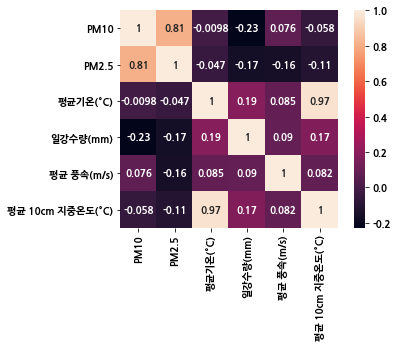

In [29]:
sns.heatmap(data=data.corr(), square = True, annot = True, cbar = True)
plt.show()

[0.8097576033407541, 2.7099418208937358e-86]
[0.7834287263633275, 3.4217694615331563e-77]


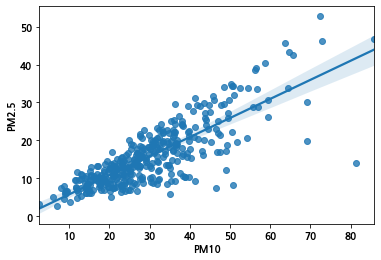

In [30]:
#미세먼지와 초미세먼지의 상관관계
sns.regplot(data = data, x="PM10", y="PM2.5")
[R1, p1] = stats.pearsonr(data["PM10"], data["PM2.5"])
print([R1, p1])
[R2, p2] = stats.spearmanr(data["PM10"], data["PM2.5"])
print([R2, p2])

#미세먼지와 초미세먼지는 상관관계가 크다. 즉, 대체로 미세먼지가 많은 날에 초미세먼지도 많다. 

### 1 . 강수량과 미세먼지 농도의 상관관계 => 비 오는 날의 미세먼지 농도는 낮을 것이다. 

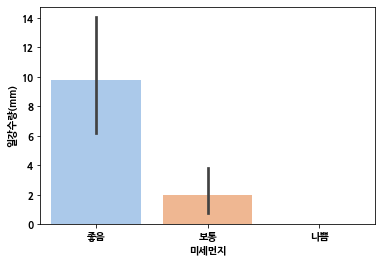

In [31]:
sns.barplot(x = "미세먼지", y  = "일강수량(mm)", data = data, palette="pastel")

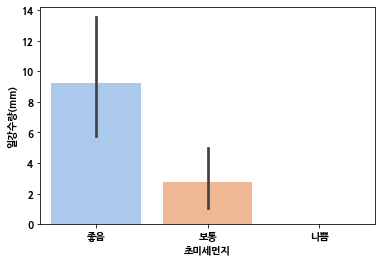

In [32]:
sns.barplot(x = "초미세먼지", y  = "일강수량(mm)", data = data, palette="pastel")

### 2 . 지중온도와 미세먼지 농도의 상관관계 => 지중온도가 높으면 미세먼지 농도가 높을 것이다. 

In [33]:
import matplotlib.ticker as ticker

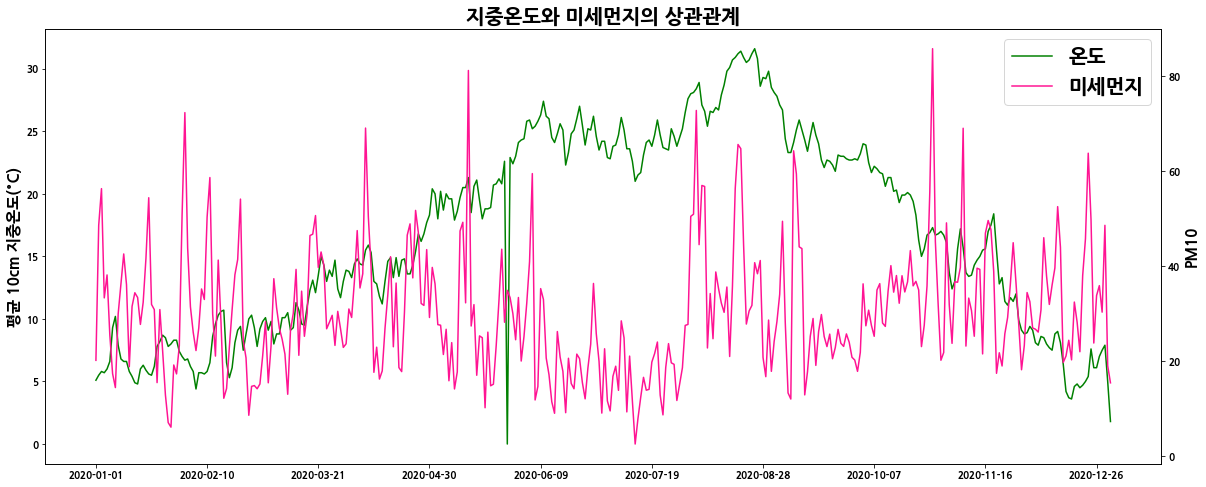

In [34]:
plt.rcParams['figure.figsize'] = (20, 8)
fig, ax1 = plt.subplots()

line1 = ax1.plot(data["일시"], data["평균 10cm 지중온도(°C)"],label = '온도',color='green')
ax2 = ax1.twinx()
line2= ax2.plot(data["일시"], data["PM10"],label = '미세먼지',color='deeppink')


ax1.xaxis.set_major_locator(ticker.MultipleLocator(40))

ax1.set_ylabel('평균 10cm 지중온도(°C)', fontsize = 15)
ax2.set_ylabel("PM10", fontsize = 15)

lines=line1+line2
labels = [l.get_label() for l in lines]

ax1.set_title("지중온도와 미세먼지의 상관관계",fontsize = 20)
ax1.legend(lines, labels, loc='upper right', fontsize = 20)

### 3 . 계절별 미세먼지 농도

Spring : March, April, May

Summer : June, July, Auguest

Autumn : September, October, November

Winter : December, January, Febuary 

In [172]:
season ={
    'Mar':'Spring','Apr':'Spring','May':'Spring',
    'June':'Summer', 'July' : 'Summer', 'Aug' : 'Summer',
    'Sep':'Autumn','Oct':'Autumn', 'Nov':'Autumn',
    'Dec' : 'Winter', 'Jan':'Winter', 'Feb':'Winter'
}
data['season']=data['monthname'].map(season)
data

,일시,PM10,PM2.5,미세먼지,초미세먼지,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 10cm 지중온도(°C),monthname,season
0,2020-01-01,20.190476,12.857143,좋음,좋음,1.9,0.0,2.3,5.1,Jan,Winter
1,2020-01-02,48.625000,34.208333,보통,보통,4.1,0.0,2.8,5.5,Jan,Winter
2,2020-01-03,56.333333,38.500000,보통,나쁨,5.9,0.0,3.0,5.8,Jan,Winter
3,2020-01-04,33.333333,22.125000,보통,보통,5.5,0.0,2.9,5.7,Jan,Winter
4,2020-01-05,38.166667,24.166667,보통,보통,7.4,0.0,1.3,6.0,Jan,Winter
...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,35.916667,21.041667,보통,보통,6.9,2.4,1.6,7.0,Dec,Winter
362,2020-12-28,30.333333,20.217391,보통,보통,8.6,0.0,1.6,7.5,Dec,Winter
363,2020-12-29,48.608696,29.666667,보통,보통,8.2,6.6,2.5,7.9,Dec,Winter
364,2020-12-30,19.043478,8.625000,좋음,좋음,-3.2,1.2,5.0,5.0,Dec,Winter


In [183]:
data1 = data.groupby(['season']).mean()

In [184]:
data1 = data1.reset_index()
data1

,season,PM10,PM2.5,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 10cm 지중온도(°C)
0,Autumn,32.170342,14.580634,17.206593,3.221978,3.024176,19.254945
1,Spring,31.349832,14.858893,13.657609,2.592391,3.421739,15.133696
2,Summer,25.946803,15.140111,23.940217,16.490217,3.201087,26.031522
3,Winter,31.069056,19.104566,5.938462,2.558242,2.983516,7.037363


In [185]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)

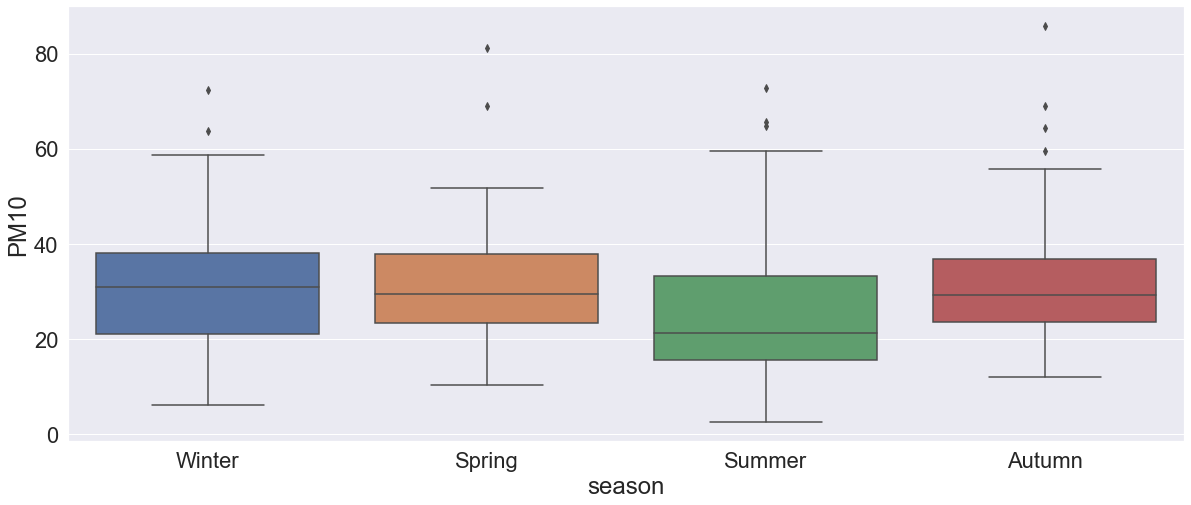

In [102]:
sns.boxplot(x="season", y="PM10", data=data)
sns.set(font_scale=2)

#미세먼지만 비교한 boxplot 이다. 차이가 미세하지만, 겨울, 봄, 가을이 많은 것을 알 수 있다. 

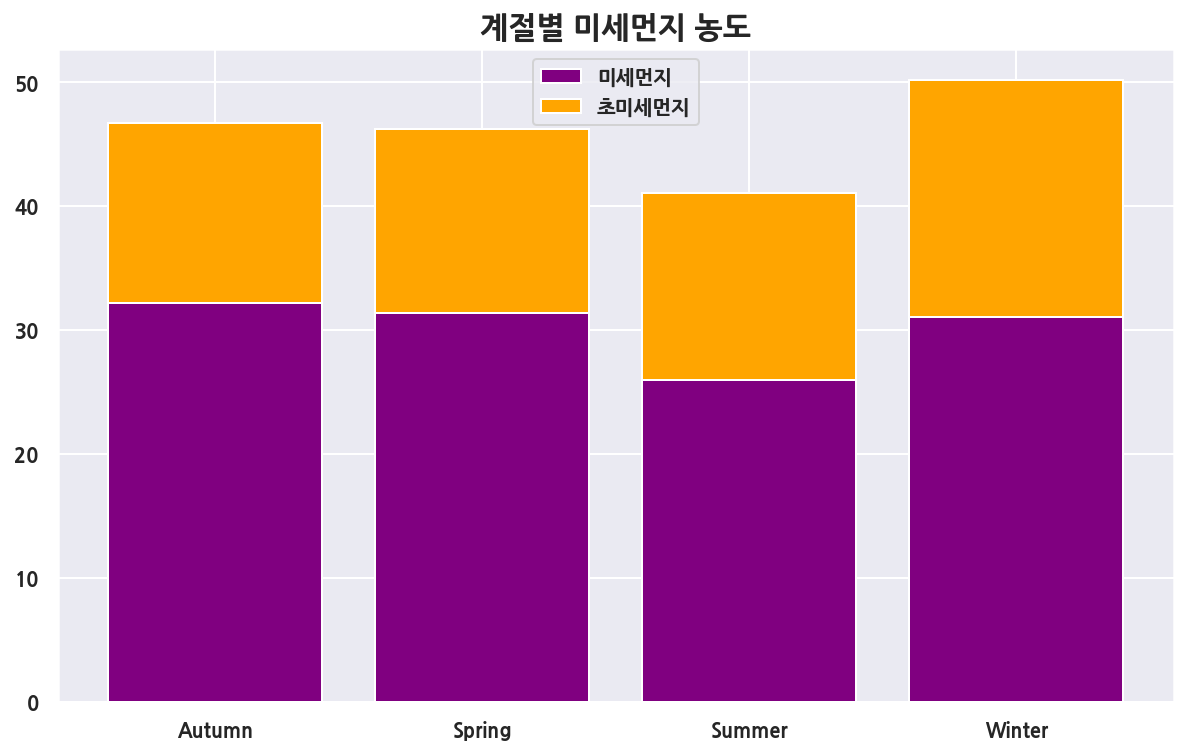

In [187]:
x = data1["season"]
y1 = data1["PM10"]
y2 = data1["PM2.5"]

plt.figure(figsize=(10,6))

p1 = plt.bar(x, y1, color='purple', label  = 'PM10')
p2 = plt.bar(x, y2, bottom = y1, color = 'orange',label = 'PM2.5')

plt.title('계절별 미세먼지 농도', fontsize = 15)
plt.legend((p1[0], p2[0]),('미세먼지','초미세먼지'))

plt.rc('font', size=5)     
plt.rc('axes', labelsize=5)  
plt.rc('xtick', labelsize=10)  
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)

#초미세먼지와 미세먼지의 합을 이용해서 그래프를 그린 것이다. 비가 많이 오는 장마철을 제외한 겨울, 가을, 봄 순으로 미세먼지가 많다. 

## --------------------------------------------------------

# 2. 의료 데이터 가공(202055150 조은이)
### 의료 데이터 중 호흡기 질환인 천식, 기침, 가래에 한해서 데이터 추출

In [45]:
data10 = pd.read_excel('hn10_all.xlsx')
data10.to_csv('hn10_all.csv')
data10_1_p = data10[data10.DJ4_pr == 1]
a = len(data10_1_p)
data10_2_p = data10[data10.HE_cough1 == 1]
aa = len(data10_2_p)
data10_3_p = data10[data10.HE_sput1 == 1]
aaa = len(data10_3_p)

In [46]:
data11 = pd.read_excel('hn11_all.xlsx')
data11.to_csv('hn11_all.csv')
data11_1_p = data11[data11.DJ4_pr == 1]
b = len(data11_1_p)
data11_2_p = data11[data11.HE_cough1 == 1]
bb = len(data11_2_p)
data11_3_p = data11[data11.HE_sput1 == 1]
bbb = len(data11_3_p)

In [47]:
data12 = pd.read_excel('hn12_all.xlsx')
data12.to_csv('hn12_all.csv')
data12_1_p = data12[data12.DJ4_pr == 1]
c = len(data12_1_p)
data12_2_p = data12[data12.HE_cough1 == 1]
cc = len(data12_2_p)
data12_3_p = data12[data12.HE_sput1 == 1]
ccc = len(data12_3_p)

In [48]:
data13 = pd.read_excel('hn13_all.xlsx')
data13.to_csv('hn13_all.csv')
data13_1_p = data13[data13.DJ4_pr == 1]
d = len(data13_1_p)
data13_2_p = data13[data13.HE_cough1 == 1]
dd = len(data13_2_p)
data13_3_p = data13[data13.HE_sput1 == 1]
ddd = len(data13_3_p)

In [49]:
data14 = pd.read_excel('hn14_all.xlsx')
data14.to_csv('hn14_all.csv')
data14_1_p = data14[data14.DJ4_pr == 1]
e = len(data14_1_p)
data14_2_p = data14[data14.HE_cough1 == 1]
ee = len(data14_2_p)
data14_3_p = data14[data14.HE_sput1 == 1]
eee = len(data14_3_p)

In [50]:
data15 = pd.read_excel('hn15_all.xlsx')
data15.to_csv('hn15_all.csv')
data15_1_p = data15[data15.DJ4_pr == 1]
f = len(data15_1_p)
data15_2_p = data15[data15.HE_cough1 == 1]
ff = len(data15_2_p)
data15_3_p = data15[data15.HE_sput1 == 1]
fff = len(data15_3_p)

In [51]:
data16 = pd.read_excel('hn16_all.xlsx')
data16.to_csv('hn16_all.csv')
data16_1_p = data16[data16.DJ4_pr == 1]
g = len(data16_1_p)
data16_2_p = data16[data16.HE_cough1 == 1]
gg = len(data16_2_p)
data16_3_p = data16[data16.HE_sput1 == 1]
ggg = len(data16_3_p)

In [52]:
data17 = pd.read_excel('hn17_all.xlsx')
data17.to_csv('hn17_all.csv')
data17_1_p = data17[data17.DJ4_pr == 1]
h = len(data17_1_p)
data17_2_p = data17[data17.HE_cough1 == 1]
hh = len(data17_2_p)
data17_3_p = data17[data17.HE_sput1 == 1]
hhh = len(data17_3_p)

In [53]:
data18 = pd.read_excel('hn18_all.xlsx')
data18.to_csv('hn18_all.csv')
data18_1_p = data18[data18.DJ4_pr == 1]
i = len(data18_1_p)
data18_2_p = data18[data18.HE_cough1 == 1]
ii = len(data18_2_p)
data18_3_p = data18[data18.HE_sput1 == 1]
iii = len(data18_3_p)

In [54]:
data19 = pd.read_excel('hn19_all.xlsx')
data19.to_csv('hn19_all.csv')
data19_1_p = data19[data19.DJ4_pr == 1]
j = len(data19_1_p)
data19_2_p = data19[data19.HE_cough1 == 1]
jj = len(data19_2_p)
data19_3_p = data19[data19.HE_sput1 == 1]
jjj = len(data19_3_p)

## 연도를 포함한 데이터 프레임 제작하여 필요한 의료 데이터 생성
## year column 추가

In [55]:
disease = {'DJ4_pr':[a, b, c, d, e, f, g, h, i, j],
               'HE_cough1':[aa, bb, cc, dd, ee, ff, gg, hh, ii, jj],
               'HE_sput1':[aaa, bbb, ccc, ddd, eee, fff, ggg, hhh, iii, jjj],
               'year':[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]}
disease_frame = DataFrame(disease)
disease_frame

,DJ4_pr,HE_cough1,HE_sput1,year
0,113,74,225,2010
1,107,96,281,2011
2,95,150,385,2012
3,95,235,519,2013
4,89,160,380,2014
5,105,120,269,2015
6,110,145,245,2016
7,118,119,184,2017
8,108,97,146,2018
9,97,146,197,2019


# <미세먼지 데이터 가공>
## 1998년부터 2019년까지 나와있는 미세먼지 데이터를 필요한 부분 가공(PM10 항목만 사용)
### 1) 1998년부터 2019년까지의 데이터에 year column 추가한 자료
### 2) 의료 데이터와의 비교를 위한 2010년부터 2019년까지의 미세먼지 데이터 자료(year column 추가)

In [68]:
weather_1 = pd.read_csv('연도별 전국 대기오염도.csv', encoding = 'cp949')
weather_2 = weather_1[12:22]
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
weather_2["year"] = year
weather_3 = weather_2[['PM10', 'year']]
weather_4 = weather_1[0:22]

<ipython-input-68-bc8969d81619>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_2["year"] = year


# 의료 데이터와 미세먼지 데이터를 하나의 DataFrame으로 merge
## year column 이용

In [70]:
data2 = pd.merge(disease_frame, weather_3)
data2

,DJ4_pr,HE_cough1,HE_sput1,year,PM10
0,113,74,225,2010,51.0
1,107,96,281,2011,50.0
2,95,150,385,2012,45.0
3,95,235,519,2013,49.0
4,89,160,380,2014,49.0
5,105,120,269,2015,48.0
6,110,145,245,2016,47.0
7,118,119,184,2017,45.0
8,108,97,146,2018,41.0
9,97,146,197,2019,41.0


# <데이터 시각화>
## 1) 1998년부터 2019년까지 미세먼지 변화 추이

In [114]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)

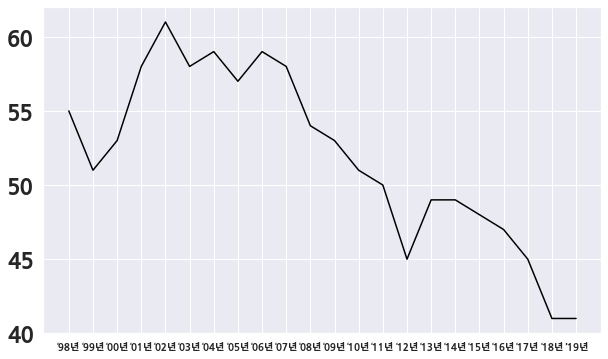

In [117]:
plt.figure(figsize = (10, 6))
plt.plot(weather_4['항목'], weather_4['PM10'], color = 'black')
plt.rc('xtick', labelsize=5)

## - 결과
### 예상했던 결과대로 미세먼지가 증가하는 추이를 보이지 않음. 오히려 감소하는 현상을 볼 수 있다.
### 즉, 가설과 결과가 맞지 않음을 확인

## 이런 결과가 나타난 원인?
### 환경 관련 보고서인 "미세먼지의 유해성과 기후변화와의 상관관계 보고서"에서 '근래 2000~2014년 동안 서울지역의 각 연도별 미세먼지 농도변화 추이를 보면 계측초기 2000년에는 약 70μg/m3을 기록하였다. 이후 2003년을 기점으로 약 60μg/m3으로 하강하다가 2015년에는 약 42μg/m3으로 안정세를 기록하였다. 이러한 하강추세는 중국의 대기의 질 개선노력으로 인해 중국 발 미세먼지 유입량이 줄어든 것으로 판단된다.'라는 구절을 보아 한창 이슈화되고 피해가 심했던 미세먼지와 대기오염에 대한 세계적인 경각심으로 인해서 줄어들었다고 추정.

## 2) 의료데이터와의 비교를 위한 2010~2019의 미세먼지 변화 추이

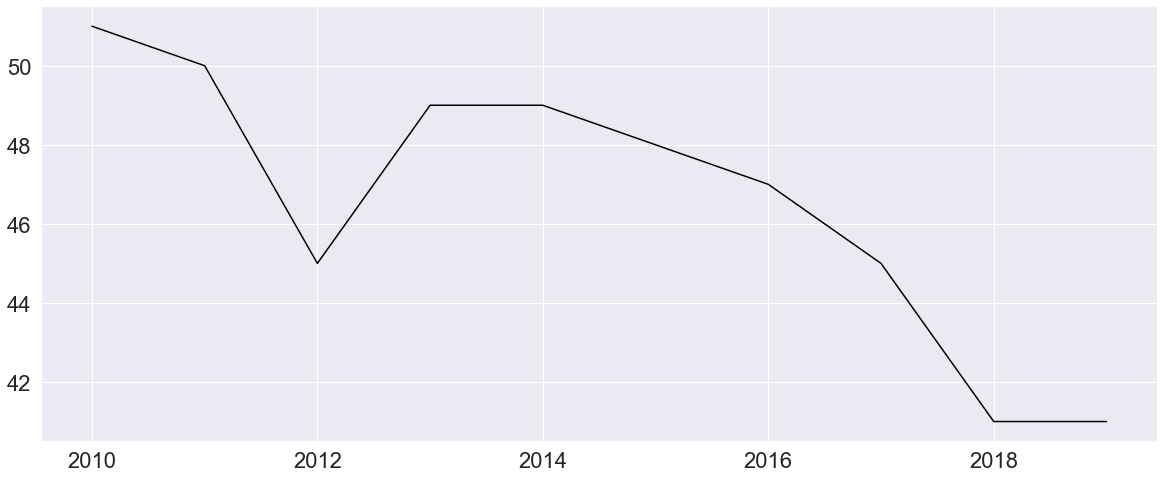

In [107]:
plt.plot(data2['year'], data2['PM10'], color = 'black')

## 결과
### 확실히 예상과 다르게 줄어든 미세먼지 수치를 확인할 수 있다.

## 3) 의료데이터와의 비교
### -1) 천식과 미세먼지
### -2) 기침과 미세먼지
### -3) 가래와 미세먼지

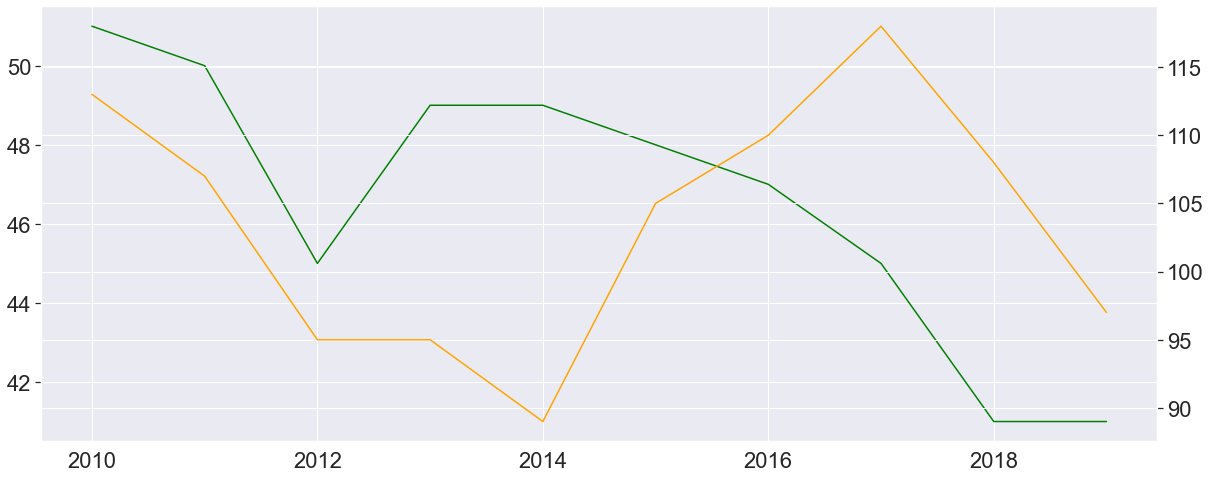

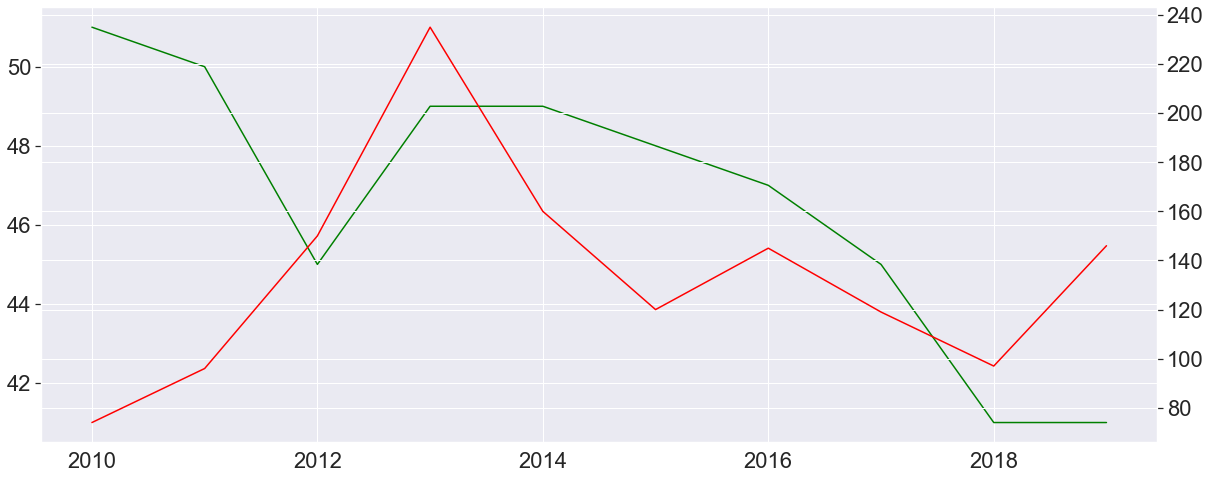

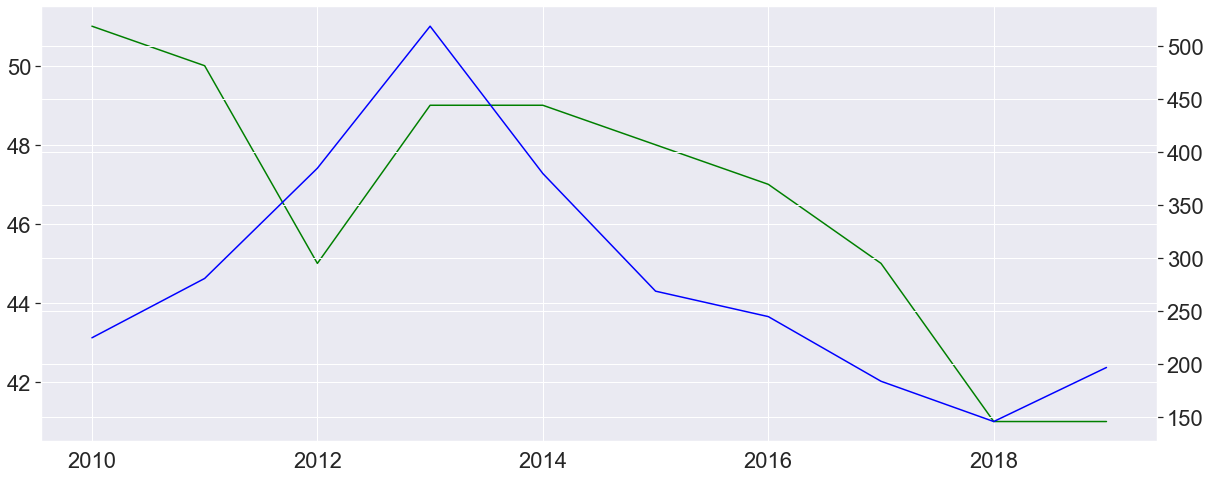

In [103]:
fig, ax1 = plt.subplots()
ax1.plot(data2['year'], data2['PM10'], color='green')

ax2 = ax1.twinx()
ax2.plot(data2['year'], data2['DJ4_pr'], color='orange')

plt.show()

fig, ax1 = plt.subplots()
ax1.plot(data2['year'], data2['PM10'], color='green')

ax2 = ax1.twinx()
ax2.plot(data2['year'], data2['HE_cough1'], color='red')

plt.show()

fig, ax1 = plt.subplots()
ax1.plot(data2['year'], data2['PM10'], color='green')

ax2 = ax1.twinx()
ax2.plot(data2['year'], data2['HE_sput1'], color='blue')

plt.show()

In [77]:
data3 = data2.drop("year", axis=1)
data3.corrwith(data3.PM10, method = 'spearman')

DJ4_pr      -0.024540
HE_cough1   -0.183494
HE_sput1     0.501550
PM10         1.000000
dtype: float64

## 결과
### 그래프만 보아도 미세먼지와 천식, 기침, 가래 각각의 상관 관계가 전혀 있지 않다는 것을 확인 할 수 있다. 그럼에도 불구하고 숫자로 계산해보자면 위와 같이 나오는 데 전혀 관계가 없다는 것을 확인 할 수 있다. 천식과 기침, 가래의 경우 미세먼지와 관계없는 개인적인 건강관리와 관련된 문제라고 생각한다.

### 그런데 여기서 기침과 가래 둘의 그래프가 굉장히 유사하게 나와서 이들 둘의 상관관계를 한번 알아보았다.

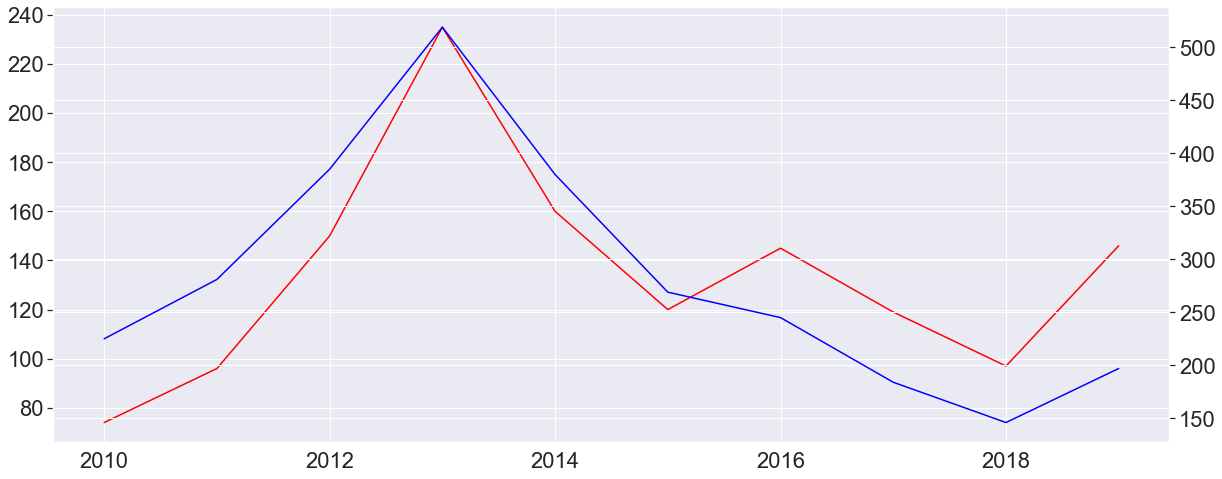

In [104]:
fig, ax1 = plt.subplots()
ax1.plot(data2['year'], data2['HE_cough1'], color='red')

ax2 = ax1.twinx()
ax2.plot(data2['year'], data2['HE_sput1'], color='blue')

plt.show()

### 둘 사이의 유사도가 굉장히 높게 나오는 것을 볼 수 있다. 이를 한 번 regplot을 이용하여서 표현해보면

[0.7995479447222924, 0.005502275964148503]
[0.6242424242424242, 0.053717767217167395]


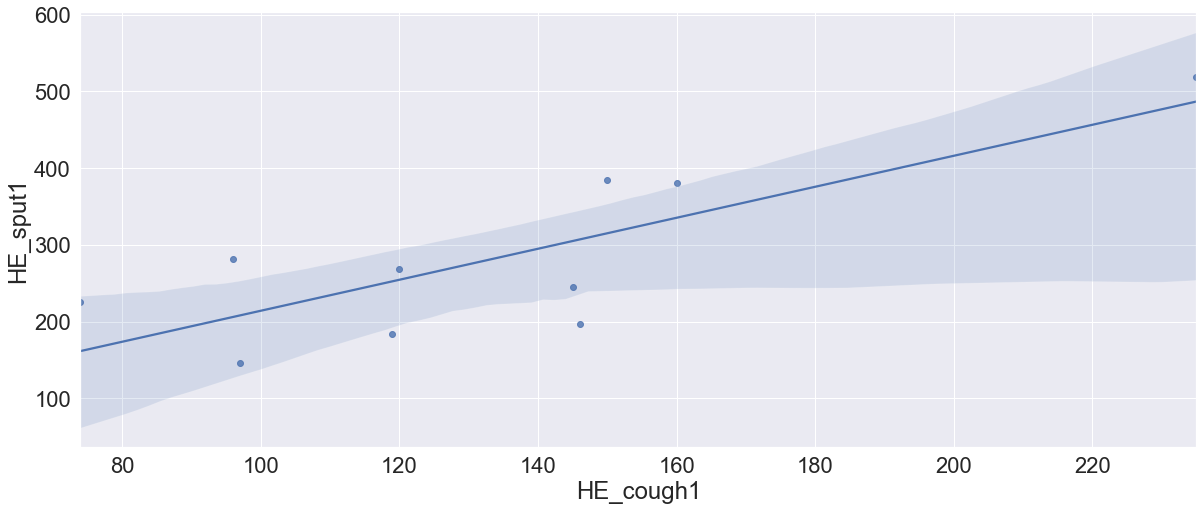

In [105]:
sns.regplot(data= data2, x = 'HE_cough1', y = 'HE_sput1')
[R1, p1] = stats.pearsonr(data2.HE_cough1, data2.HE_sput1)
print([R1, p1])
[R2, p2] = stats.spearmanr(data2.HE_cough1, data2.HE_sput1)
print([R2, p2])

### 위와 같은 결과를 얻을 수 있고 기침과 가래 간에는 비례하는 관계가 있음을 확인 할 수 있다.
### pearson의 방법으로 했을 때 p가 0.05보다 작으므로 통계적으로 유의한 수치를 나타내지만 spearman의 방법으로 p를 계산하면 0.05보다 크므로 통계적으로 유의하지 않다. 그 이유를 생각해보았을 때 spearman의 방법은 크게 벗어난 점에 의한 영향이 작기 때문에 위와 같은 결과가 나타났다고 예측한다.

## 4) 전체 데이터 간의 상관관계
### 관계가 없다는 걸 알고 있지만 한 번 확인

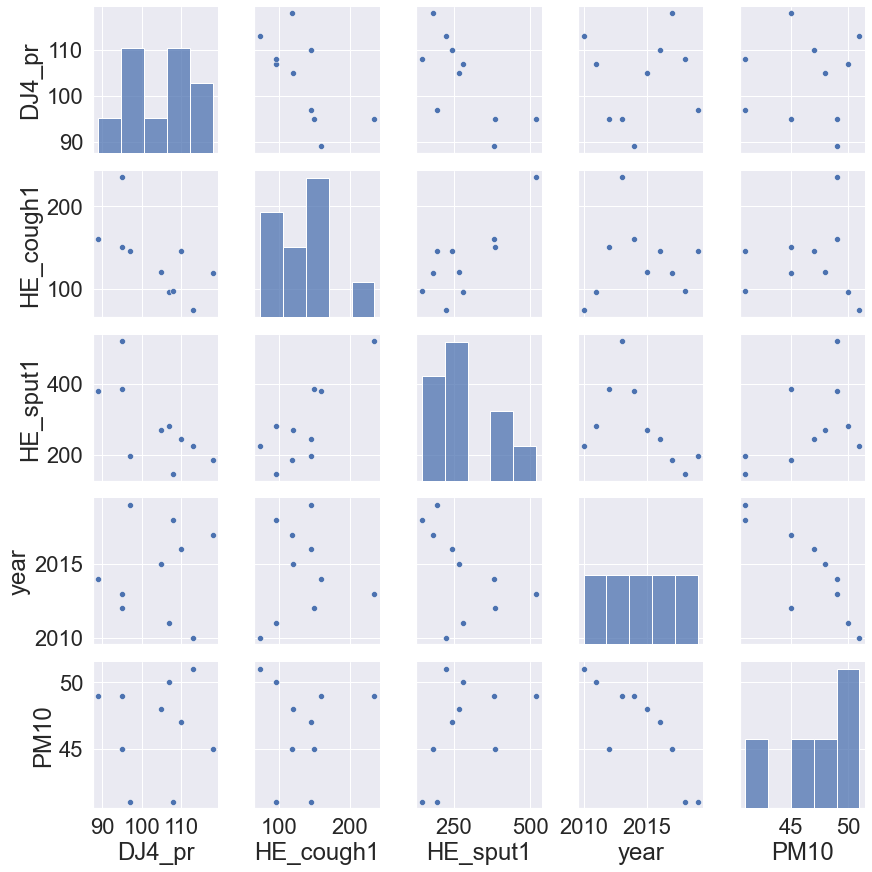

In [106]:
sns.pairplot(data2)

## 결과
### 어떠한 관계도 나타나지 않은 그래프가 그려졌다. 예상했던 결과이다.

# 탐구 결론
## 우선 미세먼지의 변화 추이부터가 예상했던 결과가 아니라서 문제가 생겼다.
## 그렇지만 현실과 이상은 다른 법이기에 예상했던 결과가 아닌 이유에 대해서 조사 해보았고 
## 그 덕에 세계적으로 대기 오염에 대한 경각심을 가지고 노력을 하고 있다는 것을 알게 되었다. 
## 또한, 우리나라 사람들이 현재는 코로나로 인해서 마스크를 매일 쓰고 다니기에 기억이 안 날 수 있지만 우리는 이미 그 전부터 황사로 인해서 황사철에 마스크를 쓰고 다녔던 사실을 기억 할 수 있다. 미세먼지와 건강에 대한 인식 수준이 높았던 것이다.
## 위의 두가지 이유에 의해서 미세먼지와 건강의 상관 관계가 없었던 것이라고 결론을 내렸다.

## 아쉬웠던 점은 2010년부터 2019년의 데이터를 사용하였기에 표현 할 수 있는 게 총 10개의 점 밖에 없었다는 것이다. 적은 숫자이다 보니 그래프를 그리거나 관계를 확인 하기에 어려움이 있었다. 